In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Importing Dependencies

In [2]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
X_train = np.array(train.drop(labels=['label'], axis=1))
y_train = np.array(train['label'])

X_test = np.array(test)

# Preprocessing the Train and Test Dataset as per CNN input requirements

In [5]:
# One Hot Encoding the Labels as the models last layer expects it
# I found out that this was the case through a gruelling debugging process XD
y_train=to_categorical(y_train,num_classes=10)

In [6]:
# Reshaping the datasets
X_train = X_train.reshape(len(X_train), 28, 28, 1)
y_train = y_train.reshape(len(y_train), 10)

X_test = X_test.reshape(len(X_test), 28, 28, 1)

# to ensure that the input data has a consistent range and distribution,
# which helps the network to learn better and faster.
X_train = X_train/255
X_test = X_test/255

In [7]:
# making sure that the all the shapes are correct
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(42000, 10)
(28000, 28, 28, 1)


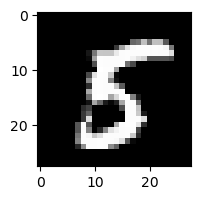

In [8]:
# Visually Representing a random image

idx = random.randint(0, len(X_train))

img = X_train[idx]

plt.figure(figsize=(2,2))
plt.imshow(img, cmap='gray')

# Model

In [9]:
# model = Sequential([
#     Conv2D(32, (1,1), activation='relu',padding='same', input_shape=(28,28, 1)),
#     BatchNormalization(),
    
#     Conv2D(32, (3,3), activation='relu', padding='same'),
#     MaxPooling2D((2,2)),
#     Dropout(0.2),
    
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     BatchNormalization(),
#     Dense(10, activation='softmax')
# ])

model = Sequential([
    Conv2D(32, (3,3), activation='relu',padding='same', input_shape=(28,28, 1)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((4,4)),
    Dropout(0.1),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    
    
    
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [10]:
datagen = ImageDataGenerator(
    rotation_range=10,  # rotate images randomly within 10 degrees
    zoom_range=0.1,     # zoom images randomly within 10%
    width_shift_range=0.1,  # shift images horizontally randomly within 10%
    height_shift_range=0.1, # shift images vertically randomly within 10%
    shear_range=0.1,    # shear images randomly within 10 degrees
    horizontal_flip=False, # flip images horizontally randomly
    vertical_flip=False   # flip images vertically randomly
)

# Fit the augmentation method on training set
datagen.fit(X_train)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0

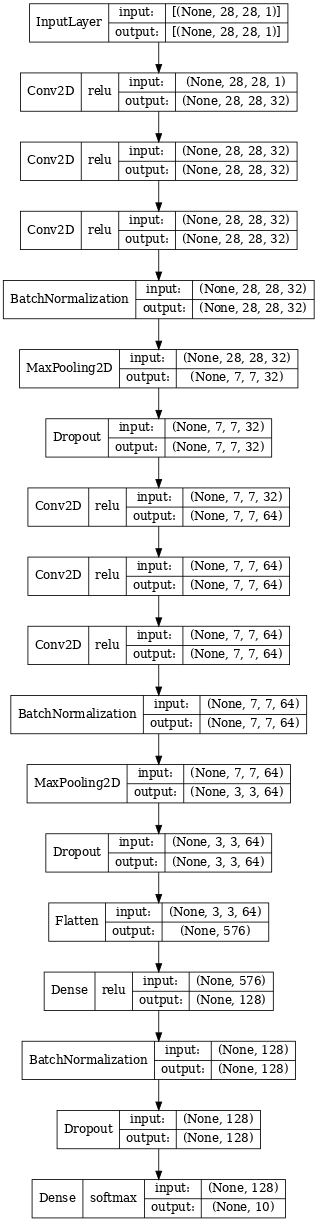

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=False, 
           dpi=60, show_layer_activations=True, rankdir='TB')

In [14]:
%%time
# model.fit(X_train, y_train, epochs=10, batch_size=9) #7 epochs


# Train the model using data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=12),
    epochs=15, 
)

Epoch 1/15


2023-03-21 03:46:33.779374: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


3500/3500 [==============================] - 56s 11ms/step - loss: 0.3219 - accuracy: 0.8980
Epoch 2/15
3500/3500 [==============================] - 40s 11ms/step - loss: 0.1313 - accuracy: 0.9610
Epoch 3/15
3500/3500 [==============================] - 39s 11ms/step - loss: 0.0996 - accuracy: 0.9706
Epoch 4/15
3500/3500 [==============================] - 40s 12ms/step - loss: 0.0828 - accuracy: 0.9752
Epoch 5/15
3500/3500 [==============================] - 39s 11ms/step - loss: 0.0706 - accuracy: 0.9794
Epoch 6/15
3500/3500 [==============================] - 39s 11ms/step - loss: 0.0682 - accuracy: 0.9811
Epoch 7/15
3500/3500 [==============================] - 40s 11ms/step - loss: 0.0575 - accuracy: 0.9837
Epoch 8/15
3500/3500 [==============================] - 40s 12ms/step - loss: 0.0565 - accuracy: 0.9836
Epoch 9/15
3500/3500 [==============================] - 40s 11ms/step - loss: 0.0523 - accuracy: 0.9853
Epoch 10/15
3500/3500 [==============================] - 40s 11ms/step - lo

Text(0.5, 1.0, 'Accuracy Plot')

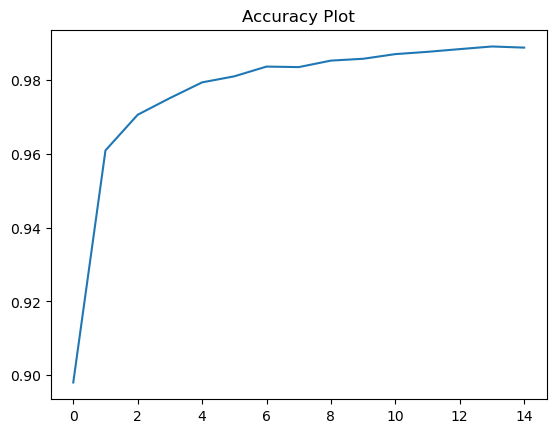

In [15]:
plt.plot(model.history.history['accuracy'])
plt.title('Accuracy Plot')

Text(0.5, 1.0, 'Loss Plot')

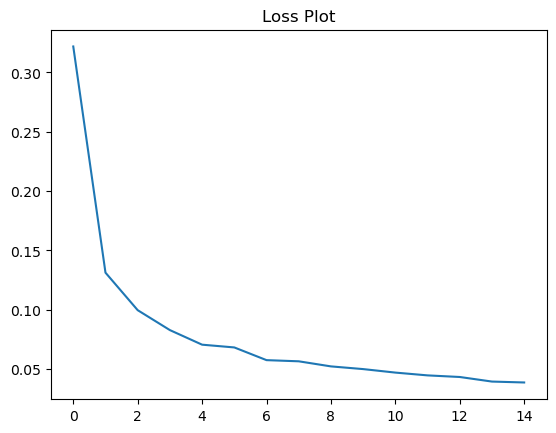

In [16]:
plt.plot(model.history.history['loss'])
plt.title('Loss Plot')

# Making Predictions

In [17]:
predictions = model.predict(X_test)
predictions

875/875 [==============================] - 3s 3ms/step


array([[1.14494263e-08, 7.13183113e-09, 9.99999762e-01, ...,
        4.80260312e-08, 2.26826451e-08, 1.74282793e-08],
       [9.99994040e-01, 1.91865457e-08, 4.64196660e-07, ...,
        1.41611295e-07, 1.09635812e-06, 5.03066417e-07],
       [8.38407777e-06, 6.71866019e-07, 2.94958183e-04, ...,
        4.10740904e-06, 5.77512989e-03, 9.93828237e-01],
       ...,
       [1.38706227e-07, 6.18502849e-09, 3.92987420e-10, ...,
        1.72969905e-07, 1.15698256e-07, 2.47609560e-08],
       [2.02427964e-06, 1.78836206e-06, 3.00612669e-07, ...,
        2.56943094e-05, 3.51949075e-06, 9.99816477e-01],
       [3.48246515e-10, 2.94297850e-11, 1.00000000e+00, ...,
        1.04025721e-09, 4.24662394e-09, 2.87533908e-09]], dtype=float32)

**Making a Function to properly represent the prediction that is understandable**

In [18]:
def result(prediction, idx):
    assert idx < len(X_test)
    assert idx >= 0
    pred = prediction[idx]
    print(f"Predicted Digit: {pred.argmax()}\n\n")
    print("Actual Digit: ")
    plt.imshow(X_test[idx], cmap='gray')

Predicted Digit: 3


Actual Digit: 


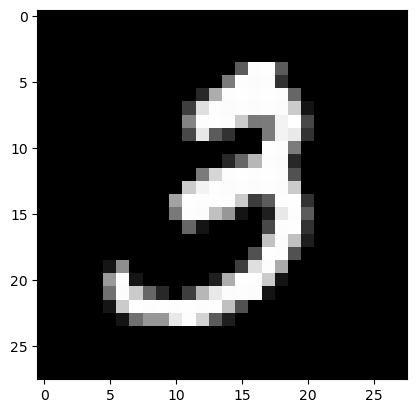

In [19]:
###### Change the index for predictions of different images in the test set
# However, note that the values of index can be in the range [0,len(X_test)) 
# and if an index out of the scope is entered, the function will throw an assertion error
result(predictions, 6900)

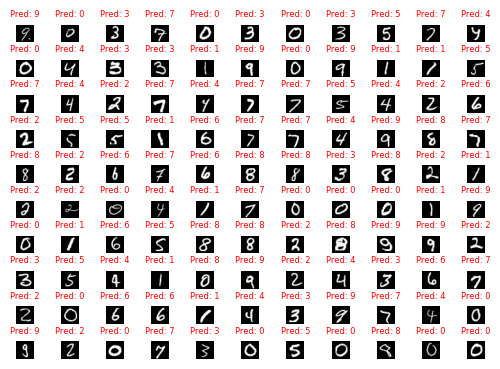

In [20]:
from math import sqrt

GRID_SIZE = 110
params = int(sqrt(GRID_SIZE)) + 1
random_state = 1
plt.subplots_adjust(hspace=1, wspace=0)

font = {'family': 'comicsans',
        'color': 'red',
        'size': 6}

for x in range(1, GRID_SIZE + 1):
    idx = random_state + x
    img = X_test[idx]
    plt.subplot(params, params, x)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {predictions[idx].argmax()}", fontdict=font)

# Submission

In [21]:
def submission_result(prediction, idx):
    assert idx < len(X_test)
    assert idx >= 0
    pred = prediction[idx]
    return pred.argmax()

In [22]:
labels = []

for i in range(len(X_test)):
    labels.append(submission_result(predictions, i))

imageId = range(1, len(X_test)+1)

data = {'ImageID': imageId, 'Label': labels}

In [23]:
submission = pd.DataFrame(data=data)

In [24]:
submission.to_csv("/kaggle/working/submission.csv", index=False)